In [34]:
# For data manipulation
import pandas as pd 
# For numerical operations 
import numpy as np  
# For visualization
import matplotlib.pyplot as plt 
# For statistical plots
import seaborn as sns  

In [35]:
# Load the Excel file
file_path = "Case Study Data .xlsx"  # Ensure the file is in your working directory
xlsx = pd.ExcelFile(file_path)

# Check available sheet names
xlsx.sheet_names


['case_study_data_2025-01-16T06_4']

In [36]:
# Load the dataset
df = pd.read_excel(xlsx, sheet_name='case_study_data_2025-01-16T06_4')

# Display the first few rows
df.head(20)


,Unnamed: 0,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,1940.0
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,1460.0
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,1350.0


# Section 1: Data Cleaning and Preparation (20 points)



* Data Quality Assessment: Inspect the dataset for missing values, duplicates, or inconsistent data types. Provide a summary of issues identified and the steps taken to resolve them.


In [37]:
# Check for duplicates in each column
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
duplicate_counts


Unnamed: 0             236702
ANONYMIZED CATEGORY    333359
ANONYMIZED PRODUCT     332585
ANONYMIZED BUSINESS    328605
ANONYMIZED LOCATION    333352
QUANTITY               333326
UNIT PRICE             332354
dtype: int64

In [38]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


Unnamed: 0             0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [39]:
# Filling Null with the median of the Unit Price
df["UNIT PRICE"].fillna(df["UNIT PRICE"].median(), inplace=True)


In [40]:
print("Missing Values:\n", df.isnull().sum())
print("Total Rows After Cleaning:", len(df))


Missing Values:
 Unnamed: 0             0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64
Total Rows After Cleaning: 333405


In [41]:
print(df.dtypes)

Unnamed: 0             datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object


`The duplicates are likely not something to remove unless you have a very specific use case that requires unique rows. In fact, they could be very useful for aggregating data by category or product to perform more meaningful analyses (like total sales per category, total quantity sold per product, etc.).`


* Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column. (include a screenshot of this in your submission)

In [42]:
df.rename(columns={"Unnamed: 0": "DATE"}, inplace=True)


In [43]:
# Create the 'Month-Year' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')  # Format as 'Month Year'

# Display the first few rows to verify
print(df[['DATE', 'Month-Year']].head())

                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [44]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024


# Section 2: Exploratory Data Analysis (30 points)

In [23]:
# Calculate total quantity and value grouped by 'ANONYMIZED CATEGORY'
df['TOTAL VALUE'] = df['QUANTITY'] * df['UNIT PRICE']  # Calculate the total value per transaction

In [24]:
# Group by 'ANONYMIZED CATEGORY' and calculate the sum of quantity and total value
category_summary = df.groupby('ANONYMIZED CATEGORY').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('TOTAL VALUE', 'sum')
).reset_index()

# Display the result in a table 
category_summary

,ANONYMIZED CATEGORY,total_quantity,total_value
0,Category-100,77704,136417463.0
1,Category-101,19803,36003467.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0
5,Category-106,6582,5986975.0
6,Category-107,2757,4213107.0
7,Category-108,9782,5159195.0
8,Category-109,1453,1269541.0
9,Category-110,10614,5583150.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_5956\4120671017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_quantity', palette='viridis')


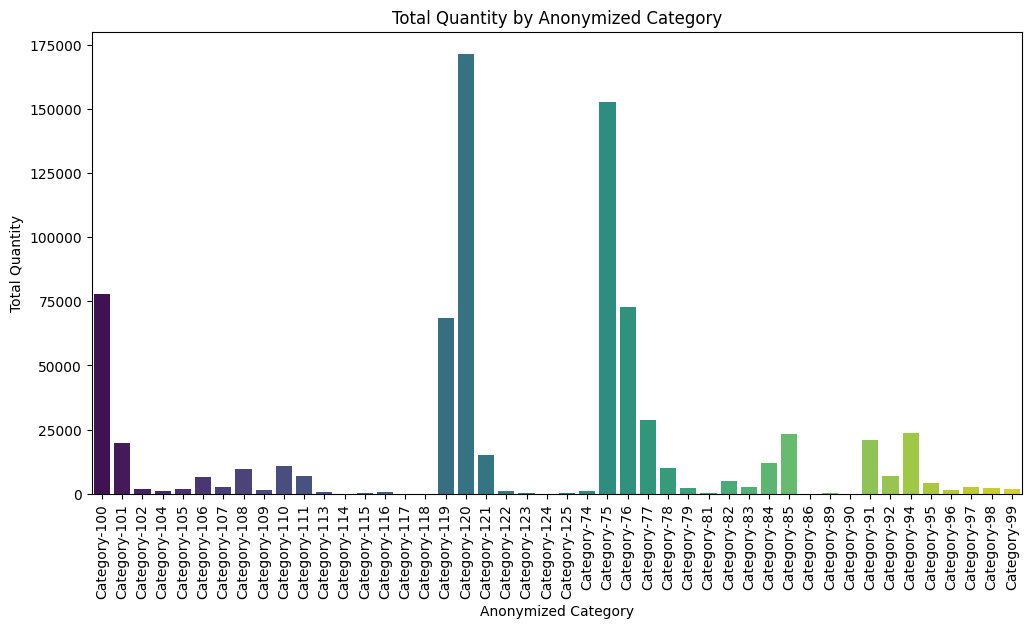

In [25]:
# Plot total quantity by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_quantity', palette='viridis')
plt.title('Total Quantity by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)  # Rotate category labels for readability
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5956\2119126339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_value', palette='plasma')


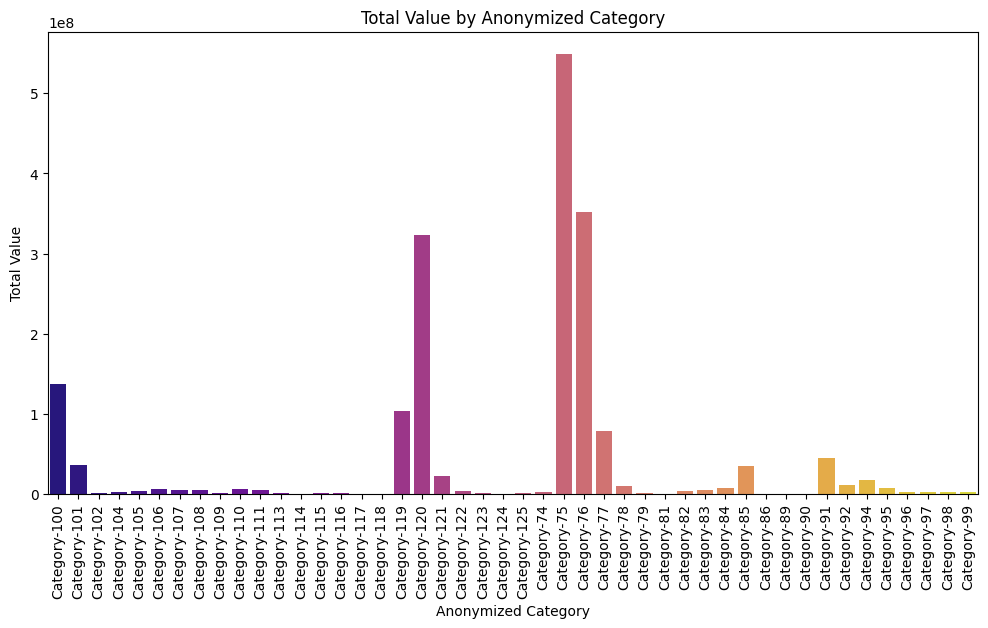

In [26]:
# Plot total value by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_value', palette='plasma')
plt.title('Total Value by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  # Rotate category labels for readability
plt.show()

### Summary of Total Quantity and Value by **ANONYMIZED CATEGORY**

#### Key Observations:

1. **Top Performing Categories**:
   - **Category-120** has the highest total quantity (171,443) and value (322,737,950.0), making it the most popular and highest-grossing category.
   - **Category-75** follows closely with a high total value (549,509,348.0) despite a lower quantity (152,643), indicating higher-priced items.

2. **Low Performing Categories**:
   - **Category-114**, **Category-122**, and **Category-124** have very low quantities (4 each) and low values, indicating potential underperformance or niche items.
   - **Category-117** and **Category-86** also show low sales, suggesting a need for strategic evaluation.

3. **Moderate Performers**:
   - Categories like **Category-101**, **Category-107**, and **Category-111** have moderate sales and value, showing steady but not exceptional performance.

4. **Sales Distribution**:
   - A significant disparity exists between the top performers and low-performing categories, highlighting the potential for growth in high-performing categories.

#### Recommendations:
- **Focus on Top Categories**: Allocate more resources to **Category-120**, **Category-75**, and **Category-76** for further growth through targeted promotions.
- **Re-assess Low-Performing Categories**: Evaluate the product offerings or marketing strategies for categories like **Category-114** and **Category-122**. Consider phasing out low-performing categories.
- **Balanced Product Mix**: Maintain a diverse product range to ensure steady revenue from both high-performing and niche categories.

These insights can guide strategic decisions regarding marketing, inventory, and product development.


In [28]:
# Step 1: Group by 'ANONYMIZED BUSINESS' and calculate total quantity and value
business_summary = df.groupby('ANONYMIZED BUSINESS').agg(
    total_quantity=('QUANTITY', 'sum'),  # Sum of quantities for each business
    total_value=('UNIT PRICE', 'sum')   # Sum of unit prices (assuming value is per product sold)
).reset_index()  # Optional: reset index to make it a normal DataFrame

In [29]:
# Step 2: Display the result
business_summary.head()  # Display the top rows

,ANONYMIZED BUSINESS,total_quantity,total_value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,18385.0
3,Business-003d,98,73251.0
4,Business-0072,127,194501.0


### Trends Over Time

In [45]:
# Group by Month-Year and calculate total quantity and total value
monthly_sales = df.groupby('Month-Year').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('UNIT PRICE', 'sum')
).reset_index()


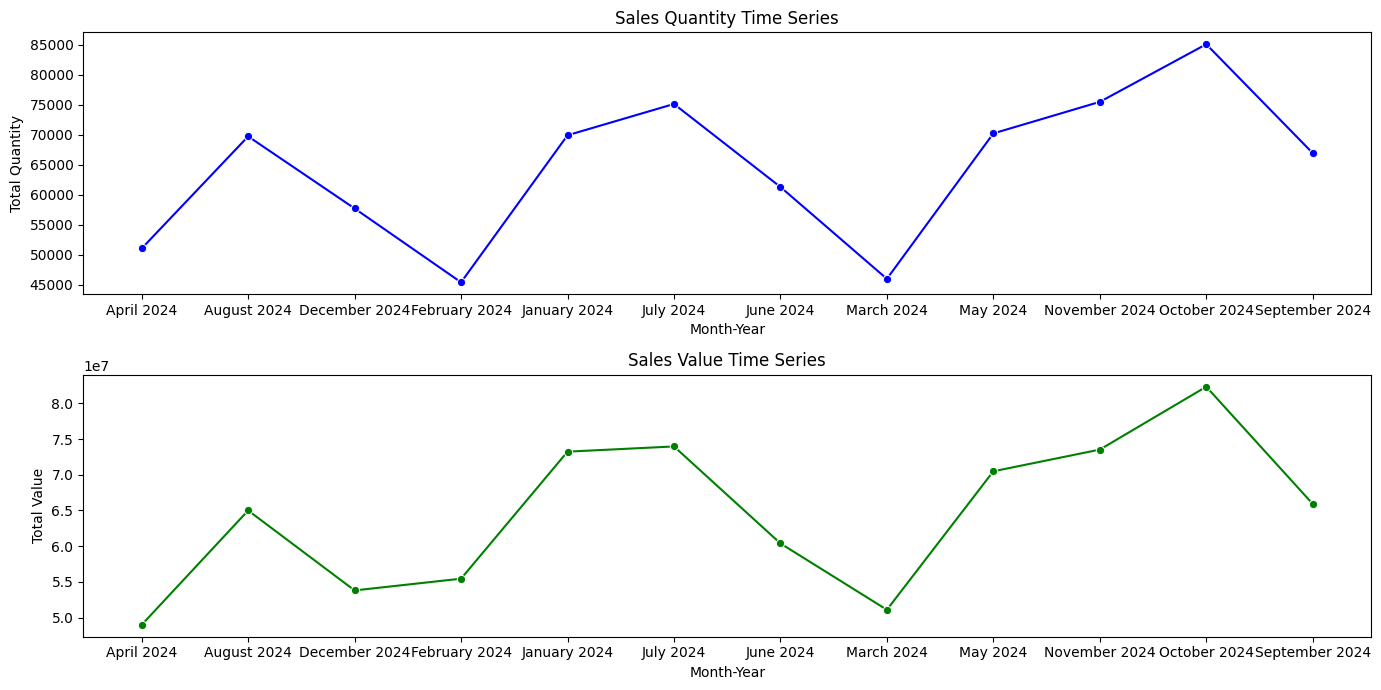

In [50]:
# Plotting the time series for total_quantity and total_value
plt.figure(figsize=(14, 7))

# Plot Total Quantity over time
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_sales, x='Month-Year', y='total_quantity', marker='o', color='blue')
plt.title('Sales Quantity Time Series')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')

# Plot Total Value over time
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_sales, x='Month-Year', y='total_value', marker='o', color='green')
plt.title('Sales Value Time Series')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()

In [52]:
# Group data by Product and calculate total quantity and total value
product_sales = df.groupby('ANONYMIZED PRODUCT').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('UNIT PRICE', 'sum')
).reset_index()

# Check the first few rows of the grouped data
product_sales.head()

,ANONYMIZED PRODUCT,total_quantity,total_value
0,Product-0001,286,452130.0
1,Product-0031,49,5238.0
2,Product-004f,8,34160.0
3,Product-02e4,225,36480.0
4,Product-031c,1242,810095.0


In [53]:
# Top 5 products based on total quantity
top_quantity_products = product_sales.sort_values(by='total_quantity', ascending=False).head(5)

# Check the result
top_quantity_products


,ANONYMIZED PRODUCT,total_quantity,total_value
339,Product-66e0,47170,28096835.0
753,Product-e805,43577,154127607.0
477,Product-8f75,38032,64124090.0
128,Product-29ee,36639,16776812.0
214,Product-4156,28704,23124899.0


In [54]:
# Top 5 products based on total value
top_value_products = product_sales.sort_values(by='total_value', ascending=False).head(5)

# Check the result
top_value_products


,ANONYMIZED PRODUCT,total_quantity,total_value
753,Product-e805,43577,154127607.0
477,Product-8f75,38032,64124090.0
339,Product-66e0,47170,28096835.0
681,Product-d09c,18303,24360267.0
109,Product-2175,12044,24343045.0
